  <div role="main"><span id="maincontent"></span><h2>Zadanie 5.1. Naiwny klasyfikator bayesowski</h2><div data-region="activity-information" data-activityname="Zadanie 5.1. Naiwny klasyfikator bayesowski" class="activity-information">
    </div>
</div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p></p><h3>Część podstawowa (4 punkty)</h3><p>Użyj naiwnego klasyfikatora bayesowskiego do przewidywania, czy dany grzyb jest jadalny czy trujący, na podstawie jego wybranych cech.</p><p>(Dane pochodzą ze strony&nbsp;<a href="https://archive.ics.uci.edu/ml/datasets/mushroom" target="_blank" rel="noreferrer noopener">https://archive.ics.uci.edu/ml/datasets/mushroom</a>).</p><p>Wykorzystaj następujące dane:</p><ul><li><i>mushrooms.tsv</i><a role="button" download="" href="https://canvas.instructure.com/courses/1866792/files/92745639/download?download_frd=1">&nbsp;</a>– pierwsza kolumna oznacza, czy grzyb jest jadalny (<strong>e</strong>&nbsp;–&nbsp;<em>edible</em>) czy trujący (<strong>p</strong>&nbsp;–&nbsp;<em>poisonous</em>), pozostałe to wartości poszczególnych cech.</li></ul><p>Pamiętaj, żeby najpierw zamienić dane kategoryczne na kolumny zero-jedynkowe, np. używając funkcji <a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">get_dummies</a> z biblioteki pandas, a następnie podzielić zbiór danych na dane uczące i dane testowe w odpowiednich proporcjach.</p><p>Możesz użyć gotowej implementacji algorytmu, np. z pakietu&nbsp;<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank" rel="noreferrer noopener">scikit-learn</a>&nbsp;(zob.&nbsp;<a href="https://git.wmi.amu.edu.pl/pms/umz21/src/branch/master/lab/04_scikit-learn.ipynb" target="_blank">przykład</a>).</p><p>Pamiętaj o podziale danych na zbiory uczący i testowy oraz o ewaluacji.<br></p><h3>Część zaawansowana (3 punkty)</h3><p>Porównaj dokładność (<em>accuracy</em>) klasyfikatora wytrenowanego na wszystkich cechach z dokładnością klasyfikatora wytrenowanego na 3 wybranych cechach.</p><br><p></p></div>
    </div><div id="assign_files_tree648eb349834f81"><ul><li yuiConfig='{"type":"html"}'><div><div class="fileuploadsubmission"><a target="_blank" href="https://lms.amu.edu.pl/sci/pluginfile.php/30140/mod_assign/introattachment/0/mushrooms.tsv?forcedownload=1">mushrooms.tsv</a>   </div>
    


### Część podstawowa

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from ucimlrepo import fetch_ucirepo 

# Pobranie danych
mushroom = fetch_ucirepo(id=73)
X = mushroom.data.features
y = mushroom.data.targets["poisonous"]  # target jako Series

# Zamiana cech kategorycznych na cechy zero-jedynkowe
X_encoded = pd.get_dummies(X)

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Nauka i predykcja
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Dokładność
accuracy_all = accuracy_score(y_test, y_pred)
print("Dokładność (wszystkie cechy):", accuracy_all)



Dokładność (wszystkie cechy): 0.9507692307692308


### Część zaaawansowana 

In [11]:

# Wybrane cechy
selected_features = ["odor", "spore-print-color", "gill-size"] 

# Przetwarzanie
X_selected = pd.get_dummies(X[selected_features])
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Trening i predykcja
model_sel = MultinomialNB()
model_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = model_sel.predict(X_test_sel)

# Ocena
accuracy_selected = accuracy_score(y_test_sel, y_pred_sel)
print("Dokładność (3 cechy – odor, spore-print-color, gill-size):", accuracy_selected)


Dokładność (3 cechy – odor, spore-print-color, gill-size): 0.9864615384615385


<div role="main"><span id="maincontent"></span><h2>Zadanie 5.2. KNN</h2><div data-region="activity-information" data-activityname="Zadanie 5.12. KNN" class="activity-information">
    </div>
</div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p></p>
</div><div id="intro" class="box py-3 generalbox boxaligncenter"><div class="no-overflow"><p><h3>Część podstawowa (4 punkty)</h3><p>Użyj algorytmu&nbsp;<em>k</em>&nbsp;najbliższych sąsiadów do przewidywania, czy dany grzyb jest jadalny czy trujący, na podstawie jego wybranych cech.</p><p>(Dane pochodzą ze strony&nbsp;<a href="https://archive.ics.uci.edu/ml/datasets/mushroom" target="_blank" rel="noreferrer noopener">https://archive.ics.uci.edu/ml/datasets/mushroom</a>).</p><p>Wykorzystaj następujące dane:</p><ul><li><i>mushrooms.tsv</i><a role="button" download="" href="https://canvas.instructure.com/courses/1866792/files/92745639/download?download_frd=1">&nbsp;</a>– pierwsza kolumna oznacza, czy grzyb jest jadalny (<strong>e</strong>&nbsp;–&nbsp;<em>edible</em>) czy trujący (<strong>p</strong>&nbsp;–&nbsp;<em>poisonous</em>), pozostałe to wartości poszczególnych cech.</li></ul><p>Pamiętaj, żeby najpierw zamienić dane kategoryczne na kolumny zero-jedynkowe, np. używając funkcji&nbsp;<a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">get_dummies</a>&nbsp;z biblioteki pandas, a następnie podzielić zbiór danych na dane uczące i dane testowe w odpowiednich proporcjach.</p><p>Możesz użyć gotowej implementacji algorytmu, np. z pakietu&nbsp;<a href="https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification" target="_blank">scikit-learn</a>&nbsp;(zob.&nbsp;<a href="https://git.wmi.amu.edu.pl/pms/umz21/src/branch/master/lab/04_scikit-learn.ipynb" target="_blank">przykład</a>).</p><h3>Część zaawansowana (3 punkty)</h3><p>Porównaj wyniki dla kilku różnych wartości&nbsp;<em>k</em>.<br></p><br></p>
    </div><div id="assign_files_tree648eb349834f81"><ul><li yuiConfig='{"type":"html"}'><div><div class="fileuploadsubmission"><a target="_blank" href="https://lms.amu.edu.pl/sci/pluginfile.php/30140/mod_assign/introattachment/0/mushrooms.tsv?forcedownload=1">mushrooms.tsv</a>   </div>
    



### Część podstawowa

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X_encoded = pd.get_dummies(X)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# KNN z domyślnym k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Dokładność
accuracy_knn = accuracy_score(y_test, y_pred)
print("Dokładność KNN (k=5):", accuracy_knn)

Dokładność KNN (k=5): 1.0


### Część zaawansowana

In [18]:
# Test dla kilku wartości k
for k in [1, 3, 5, 7, 11, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność KNN (k={k}): {acc:.4f}")

Dokładność KNN (k=1): 1.0000
Dokładność KNN (k=3): 1.0000
Dokładność KNN (k=5): 1.0000
Dokładność KNN (k=7): 1.0000
Dokładność KNN (k=11): 1.0000
Dokładność KNN (k=15): 1.0000


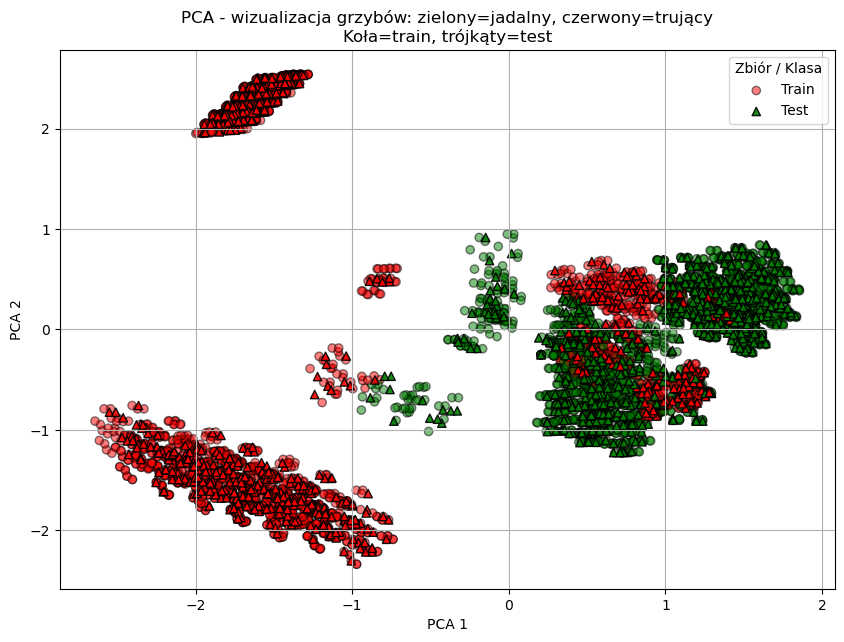

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Redukcja wymiaru do 2D dla wizualizacji
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Indeksy danych treningowych i testowych
train_idx = X_train.index
test_idx = X_test.index

# Kolory według klasy (jadalny 'e', trujący 'p')
colors = {'e': 'green', 'p': 'red'}

plt.figure(figsize=(10, 7))

# Wszystkie punkty w X_encoded, ale z podziałem na train/test i klasę
plt.scatter(X_pca[train_idx, 0], X_pca[train_idx, 1], 
            c=y.loc[train_idx].map(colors), marker='o', label='Train', alpha=0.5, edgecolor='k')

plt.scatter(X_pca[test_idx, 0], X_pca[test_idx, 1], 
            c=y.loc[test_idx].map(colors), marker='^', label='Test', alpha=0.9, edgecolor='k')

plt.legend(title="Zbiór / Klasa")
plt.title("PCA - wizualizacja grzybów: zielony=jadalny, czerwony=trujący\nKoła=train, trójkąty=test")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

